In [1]:
%pylab inline
from skyfield import api
from pytz import timezone
eastern = timezone('US/Eastern')
#from io import StringIO

Populating the interactive namespace from numpy and matplotlib


In [2]:
sats = api.load.tle('https://celestrak.com/NORAD/elements/stations.txt')
tiangong = sats['TIANGONG 1']

[#################################] 100% stations.txt
[#################################] 100% deltat.data
[#################################] 100% deltat.preds
[#################################] 100% Leap_Second.dat


In [3]:
# Two days, starting at 2018-03-31 18:00 UTC

minutes = range(60 * 24 * 2)
ts = api.load.timescale()
t = ts.utc(2018, 3, 31, 18, minutes)
print(t)

<Time 2880 values from tt=2458209.250801 to tt=2458211.250106>


In [4]:
bluffton = api.Topos(latitude='40.8953 N', longitude='83.8888 W')
orbit = (tiangong - bluffton).at(t)
alt, az, distance = orbit.altaz()
risings = (alt.degrees < 0)[:-1] & (alt.degrees > 0)[1:]

In [5]:
print(risings)

[False False False ... False False False]


In [6]:
print(risings.nonzero())

(array([ 901,  992, 1084, 1176, 1268, 2302, 2392, 2484, 2576, 2667]),)


In [7]:
settings = (alt.degrees > 0)[:-1] & (alt.degrees < 0)[1:]
print(settings.nonzero())

(array([ 907,  999, 1091, 1182, 1273, 2307, 2399, 2490, 2582, 2673]),)


In [8]:
for ti in t[1:][risings]: print(ti.astimezone(eastern))

2018-04-01 05:02:00-04:00
2018-04-01 06:33:00-04:00
2018-04-01 08:05:00-04:00
2018-04-01 09:37:00-04:00
2018-04-01 11:09:00-04:00
2018-04-02 04:23:00-04:00
2018-04-02 05:53:00-04:00
2018-04-02 07:25:00-04:00
2018-04-02 08:57:00-04:00
2018-04-02 10:28:00-04:00


In [9]:
def plot_sky(i, j):
    print('Rises:', t[i].astimezone(eastern))
    print('Rises:', t[j].astimezone(eastern))
    ax = plt.subplot(111, projection='polar')
    ax.set_rlim([0, 90])
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    θ = az.radians
    r = 90 - alt.degrees
    k = (i + j) // 2
    #color = (0, 0.5, arange(j - i) / (j - i))
    #print(color)
    #ax.plot(az.radians[i:k], 90 - alt.degrees[i:k], 'go--')
    #ax.plot(az.radians[k-1:j], 90 - alt.degrees[k-1:j], 'ro--')
    ax.plot(θ[i:j], r[i:j], 'ro--')
    #ax.arrow(θ[k], r[k], θ[k+1] - θ[k], r[k+1] - r[k],
    #        head_width=0.5, head_length=1)
    for k in range(i, j):
        text = t[k].astimezone(eastern).strftime('%H:%M')
        ax.text(θ[k], r[k], text, ha='right', va='bottom')

Rises: 2018-04-01 05:02:00-04:00
Rises: 2018-04-01 05:08:00-04:00


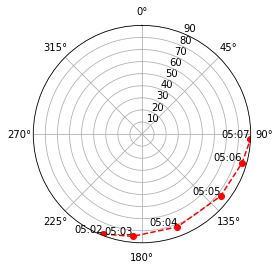

In [10]:
plot_sky(902, 908)

Rises: 2018-04-01 06:33:00-04:00
Rises: 2018-04-01 06:40:00-04:00


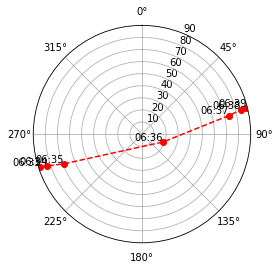

In [11]:
plot_sky(993, 1000)